<a href="https://colab.research.google.com/github/snehotosh/Deep-Learning/blob/master/1_MNIST_HelloWorld_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from __future__ import absolute_import, division, print_function

!pip install tensorflow-gpu==2.0.0-alpha0
import tensorflow as tf

In [0]:
mnist = tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()



In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

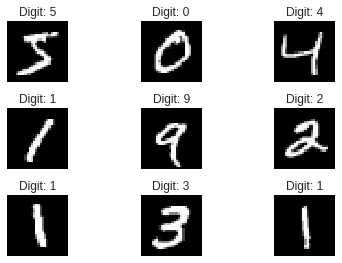

In [42]:
fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(x_train[i], cmap='gray', interpolation='none')
  plt.title("Digit: {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])


In [43]:
print("x_train shape", x_train.shape)
print("y_train shape", y_train.shape)
print("x_test shape", x_test.shape)
print("y_test shape", y_test.shape)

x_train shape (60000, 28, 28)
y_train shape (60000,)
x_test shape (10000, 28, 28)
y_test shape (10000,)


In [25]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [0]:
x_train = x_train/255.
x_test = x_test/255.


In [0]:
#Building Sequential Model Architecture
network = tf.keras.models.Sequential()
network.add(tf.keras.layers.Flatten(input_shape=(28,28)))   # This makes the shape (None,28*28)
network.add(tf.keras.layers.Dense(128,activation='relu'))   # No. of params = 784*128 + 128
network.add(tf.keras.layers.Dropout(0.2))                   # No parameters
network.add(tf.keras.layers.Dense(10,activation='softmax')) # No. of params = 128*10 + 10


In [28]:
# Check the Model architecture
network.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [0]:
# Compiling the model
network.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy',metrics=['accuracy'])

In [44]:
# Model fitting
history = network.fit(x=x_train,y=y_train,epochs=30,verbose=1,validation_data=(x_test, y_test),batch_size=128)

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 2s 40us/sample - loss: 0.0136 - accuracy: 0.9953 - val_loss: 0.0853 - val_accuracy: 0.9844
Epoch 2/30
60000/60000 [==============================] - 3s 42us/sample - loss: 0.0095 - accuracy: 0.9969 - val_loss: 0.0861 - val_accuracy: 0.9839
Epoch 3/30
60000/60000 [==============================] - 3s 42us/sample - loss: 0.0107 - accuracy: 0.9963 - val_loss: 0.0847 - val_accuracy: 0.9841
Epoch 4/30
60000/60000 [==============================] - 3s 42us/sample - loss: 0.0098 - accuracy: 0.9967 - val_loss: 0.0883 - val_accuracy: 0.9835
Epoch 5/30
60000/60000 [==============================] - 3s 43us/sample - loss: 0.0099 - accuracy: 0.9966 - val_loss: 0.0896 - val_accuracy: 0.9841
Epoch 6/30
60000/60000 [==============================] - 3s 42us/sample - loss: 0.0102 - accuracy: 0.9965 - val_loss: 0.0920 - val_accuracy: 0.9835
Epoch 7/30
60000/60000 [==============================] 

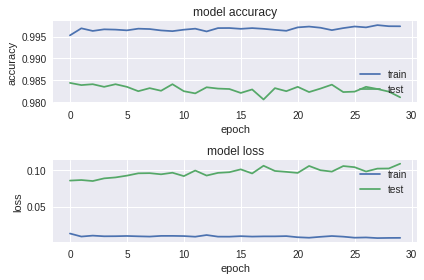

In [49]:
# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

In [52]:
loss_and_metrics = network.evaluate(x_test,y_test)

10000/10000 [==============================] - 1s 76us/sample - loss: 0.1082 - accuracy: 0.9811


In [57]:
print('Test Accuracy:',loss_and_metrics[1])
print('Test Loss:',loss_and_metrics[0])

Test Accuracy: 0.9811
Test Loss: 0.1081804131631696


## Which Figure went wrong

In [0]:
predicted_classes = network.predict_classes(x_test)

In [59]:
predicted_classes

array([7, 2, 1, ..., 4, 5, 6])

In [0]:
import numpy as np

In [71]:
# see which we predicted correctly and which not
correct_indices = np.nonzero(predicted_classes == y_test)[0] # return the index of matching elements
incorrect_indices = np.nonzero(predicted_classes != y_test)[0] # return the index of non-matching elements
print()
print(len(correct_indices)," classified correctly")
print(len(incorrect_indices)," classified incorrectly")



9811  classified correctly
189  classified incorrectly


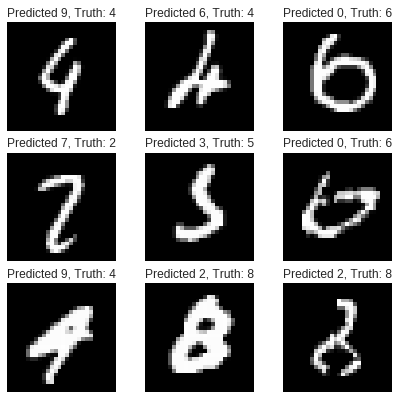

In [74]:
# adapt figure size to accomodate 18 subplots
plt.rcParams['figure.figsize'] = (7,14)

figure_evaluation = plt.figure()

# plot 9 incorrect predictions
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(6,3,i+10)
    plt.imshow(x_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title(
      "Predicted {}, Truth: {}".format(predicted_classes[incorrect], 
                                       y_test[incorrect]))
    plt.xticks([])
    plt.yticks([])

#figure_evaluation